In [1]:
import pandas as pd  # pandas: for handling data in DataFrames
import numpy as np  # numpy: for numerical operations
import matplotlib.pyplot as plt  # matplotlib: for plotting data
from sklearn.metrics.pairwise import cosine_similarity  # sklearn: for cosine similarity computation
from tqdm import tqdm  # tqdm: for progress bars
import random  # random: for random operations
import os  # os: for operating system interfaces
from pyteomics import mgf  # pyteomics: for handling MGF files
import plotly.graph_objects as go  # plotly: for interactive plots
from itertools import cycle  # itertools: for creating iterators

In [1]:
import os
from pyteomics import mgf

import os

def parse_mgf_files(directory_path):
    mgf_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.mgf')]
    spectra = {}
    for mgf_file in mgf_files:
        print(f"Processing MGF file: {mgf_file}")
        batch_name = os.path.basename(mgf_file).replace('.mgf', '')
        spectra[batch_name] = []
        with open(mgf_file, 'r') as file:
            current_spectrum = None
            for line in file:
                line = line.strip()
                if line == "BEGIN IONS":
                    current_spectrum = {'params': {}, 'm/z array': [], 'intensity array': []}
                elif line == "END IONS":
                    if current_spectrum:
                        spectra[batch_name].append(current_spectrum)
                        current_spectrum = None
                elif '=' in line and current_spectrum is not None:
                    try:
                        key, value = line.split('=', 1)
                        current_spectrum['params'][key] = value
                    except ValueError:
                        print(f"Warning: Malformed parameter line: {line}")
                elif current_spectrum is not None:
                    try:
                        parts = line.split()
                        if len(parts) == 2:
                            mz, intensity = map(float, parts)
                            current_spectrum['m/z array'].append(mz)
                            current_spectrum['intensity array'].append(intensity)
                    except ValueError:
                        print(f"Warning: Malformed peak line: {line}")
    return spectra

# Parse .mgf files to get spectra
directory_path = r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches'
spectra = parse_mgf_files(directory_path)

# Verify that the spectra have been loaded correctly
for batch_name, batch_spectra in spectra.items():
    print(f"Batch: {batch_name}, Number of spectra: {len(batch_spectra)}")


Processing MGF file: C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf
Processing MGF file: C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf
Processing MGF file: C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf
Processing MGF file: C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf
Batch: Controles_Lote_1_2024_10_02, Number of spectra: 49
Batch: Controles_Lote_2_2024_10_02, Number of spectra: 51
Batch: Controles_Lote_3_2024_10_08, Number of spectra: 29
Batch: Controles_Lote_4_2024_10_08, Number of spectra: 23


In [6]:
import matplotlib.pyplot as plt

def plot_spectrum(spectrum, title="Spectrum Plot"):
    """
    Plota um espectro com os arrays de m/z e intensidade.
    Args:
        spectrum (dict): Um espectro contendo 'm/z array' e 'intensity array'.
        title (str): Título do gráfico.
    """
    mz_array = spectrum['m/z array']
    intensity_array = spectrum['intensity array']
    
    plt.figure(figsize=(10, 3))
    plt.stem(mz_array, intensity_array, linefmt='b-', markerfmt='bo', basefmt=" ")
    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.title(title)
    plt.grid(True)
    plt.show()

def get_spectrum_by_feature_id(spectra, batch_name, feature_id):
    """
    Retorna um espectro com base no valor de FEATURE_ID dentro de um lote.
    Args:
        spectra (dict): Dicionário de espectros por lote.
        batch_name (str): Nome do lote.
        feature_id (str): Valor alvo de FEATURE_ID.
    Returns:
        dict: O espectro correspondente ou None se não for encontrado.
    """
    for spectrum in spectra[batch_name]:
        if 'FEATURE_ID' in spectrum['params']:
            if spectrum['params']['FEATURE_ID'] == feature_id:
                return spectrum
    return None


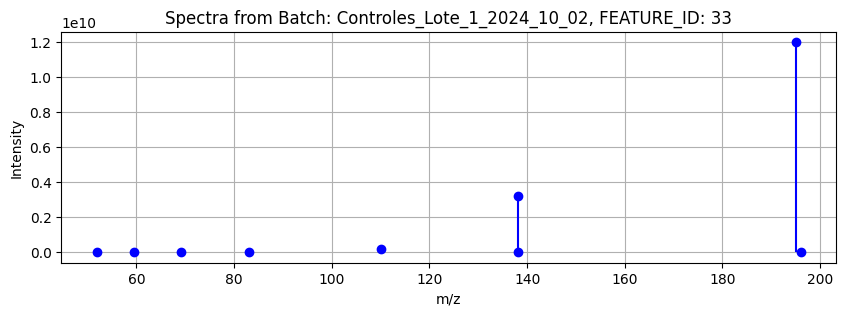

In [7]:
# Exemplo: Escolher um FEATURE_ID para plotar
batch_name = list(spectra.keys())[0]  # Escolher o primeiro lote
target_feature_id = "33"  # Substituir pelo FEATURE_ID desejado

# Obter o espectro correspondente
selected_spectrum = get_spectrum_by_feature_id(spectra, batch_name, target_feature_id)

# Plotar o espectro, se encontrado
if selected_spectrum:
    plot_spectrum(selected_spectrum, title=f"Spectra from Batch: {batch_name}, FEATURE_ID: {target_feature_id}")
else:
    print(f"No spectrum found in batch '{batch_name}' with FEATURE_ID: {target_feature_id}")


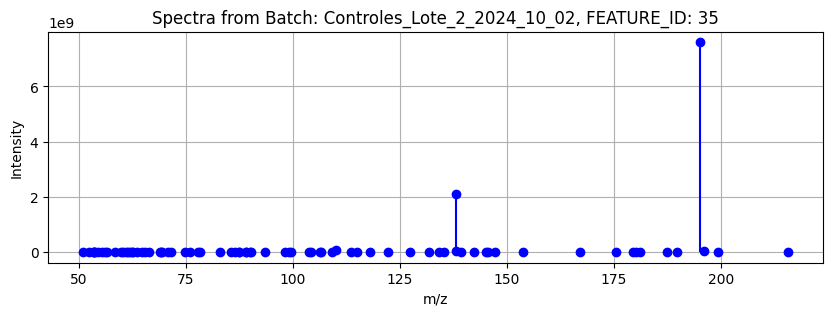

In [4]:
# Exemplo: Escolher um FEATURE_ID para plotar
batch_name = list(spectra.keys())[1]  # Escolher o primeiro lote
target_feature_id = "35"  # Substituir pelo FEATURE_ID desejado

# Obter o espectro correspondente
selected_spectrum = get_spectrum_by_feature_id(spectra, batch_name, target_feature_id)

# Plotar o espectro, se encontrado
if selected_spectrum:
    plot_spectrum(selected_spectrum, title=f"Spectra from Batch: {batch_name}, FEATURE_ID: {target_feature_id}")
else:
    print(f"No spectrum found in batch '{batch_name}' with FEATURE_ID: {target_feature_id}")


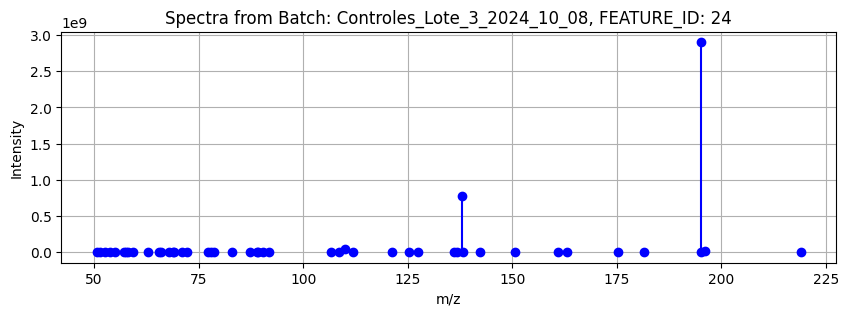

In [29]:
# Exemplo: Escolher um FEATURE_ID para plotar
batch_name = list(spectra.keys())[2]  # Escolher o primeiro lote
target_feature_id = "24"  # Substituir pelo FEATURE_ID desejado

# Obter o espectro correspondente
selected_spectrum = get_spectrum_by_feature_id(spectra, batch_name, target_feature_id)

# Plotar o espectro, se encontrado
if selected_spectrum:
    plot_spectrum(selected_spectrum, title=f"Spectra from Batch: {batch_name}, FEATURE_ID: {target_feature_id}")
else:
    print(f"No spectrum found in batch '{batch_name}' with FEATURE_ID: {target_feature_id}")


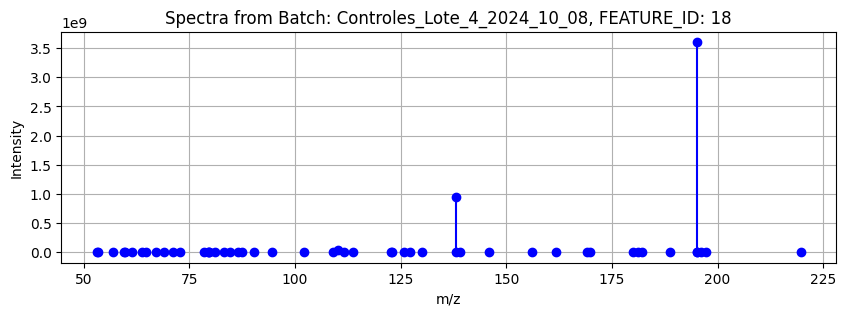

In [5]:
# Exemplo: Escolher um FEATURE_ID para plotar
batch_name = list(spectra.keys())[3]  # Escolher o primeiro lote
target_feature_id = "18"  # Substituir pelo FEATURE_ID desejado

# Obter o espectro correspondente
selected_spectrum = get_spectrum_by_feature_id(spectra, batch_name, target_feature_id)

# Plotar o espectro, se encontrado
if selected_spectrum:
    plot_spectrum(selected_spectrum, title=f"Spectra from Batch: {batch_name}, FEATURE_ID: {target_feature_id}")
else:
    print(f"No spectrum found in batch '{batch_name}' with FEATURE_ID: {target_feature_id}")


In [9]:
list(spectra.keys())[3]

'Controles_Lote_4_2024_10_08'

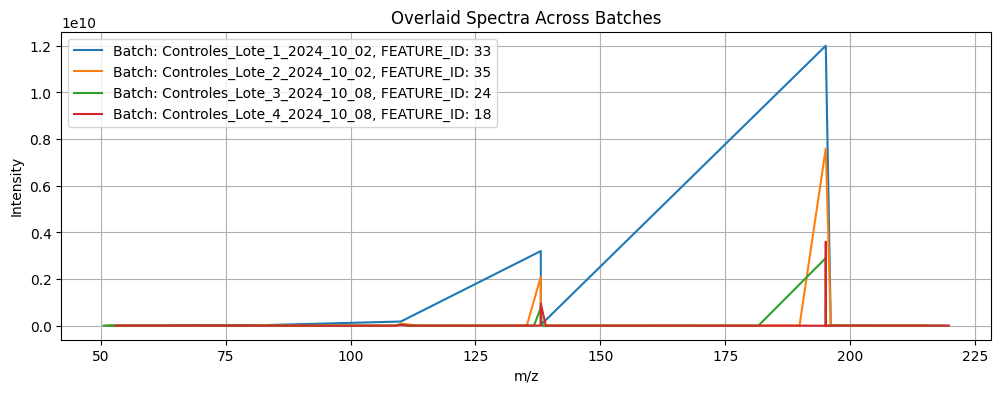

In [15]:
def plot_spectra_across_batches(spectra, batch_feature_map, title="Overlaid Spectra Across Batches"):
    """
    Plota espectros sobrepostos para FEATURE_IDs selecionados de diferentes lotes.
    Args:
        spectra (dict): Dicionário contendo os espectros por lote.
        batch_feature_map (dict): Mapeamento de {batch_name: FEATURE_ID}.
        title (str): Título do gráfico.
    """
    plt.figure(figsize=(12, 4))
    
    for batch_name, feature_id in batch_feature_map.items():
        if batch_name in spectra:
            spectrum = get_spectrum_by_feature_id(spectra, batch_name, feature_id)
            if spectrum:
                mz_array = spectrum['m/z array']
                intensity_array = spectrum['intensity array']
                plt.plot(mz_array, intensity_array, label=f"Batch: {batch_name}, FEATURE_ID: {feature_id}")
            else:
                print(f"FEATURE_ID {feature_id} not found in batch {batch_name}.")
        else:
            print(f"Batch {batch_name} not found in spectra.")

    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo: Escolher FEATURE_IDs para diferentes lotes
batch_feature_map = {
    "Controles_Lote_1_2024_10_02": "33",  # FEATURE_ID para o primeiro lote
    "Controles_Lote_2_2024_10_02": "35",  # FEATURE_ID para o segundo lote
    "Controles_Lote_3_2024_10_08": "24",  # FEATURE_ID para o terceiro lote
    "Controles_Lote_4_2024_10_08": "18",  # FEATURE_ID para o quarto lote
    # Adicione mais lotes e FEATURE_IDs conforme necessário
}

# Plotar os espectros
plot_spectra_across_batches(spectra, batch_feature_map, title="Overlaid Spectra Across Batches")


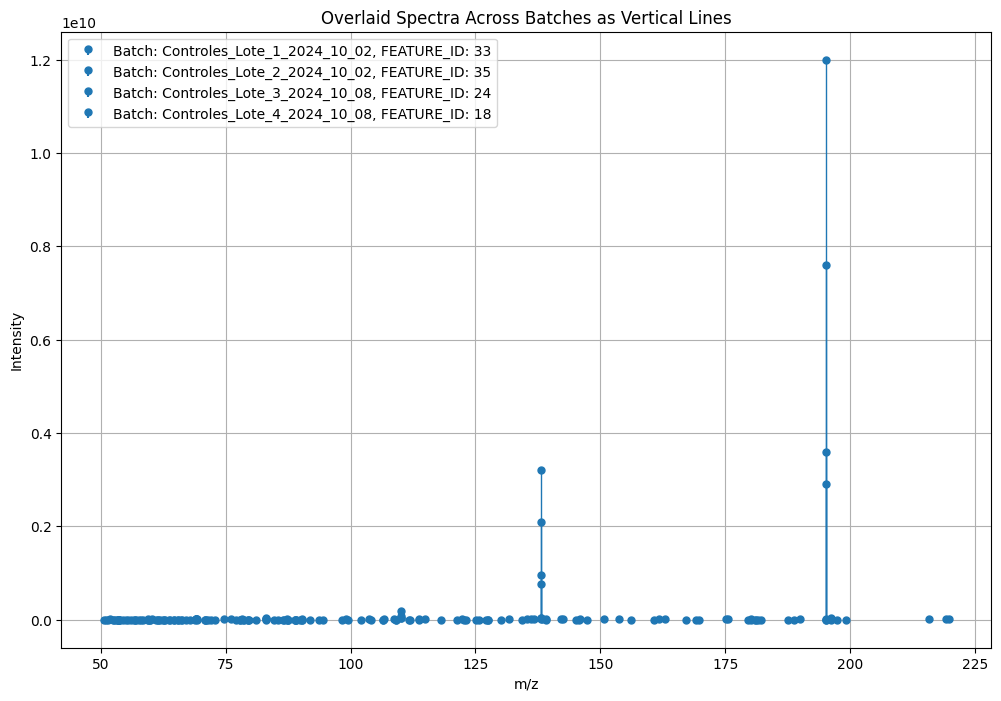

In [17]:
def plot_spectra_as_stem_across_batches(spectra, batch_feature_map, title="Overlaid Spectra Across Batches"):
    """
    Plota espectros como barras verticais (stem plot) para FEATURE_IDs selecionados de diferentes lotes.

    Args:
        spectra (dict): Dicionário contendo os espectros por lote.
        batch_feature_map (dict): Mapeamento de {batch_name: FEATURE_ID}.
        title (str): Título do gráfico.
    """
    plt.figure(figsize=(12, 8))
    
    for batch_name, feature_id in batch_feature_map.items():
        if batch_name in spectra:
            spectrum = get_spectrum_by_feature_id(spectra, batch_name, feature_id)
            if spectrum:
                mz_array = spectrum['m/z array']
                intensity_array = spectrum['intensity array']
                # Criar gráfico com linhas verticais
                markerline, stemlines, baseline = plt.stem(
                    mz_array, intensity_array, label=f"Batch: {batch_name}, FEATURE_ID: {feature_id}", basefmt=" "
                )
                plt.setp(stemlines, linestyle="-", linewidth=1)  # Personaliza as linhas verticais
                plt.setp(markerline, marker="o", markersize=5)   # Personaliza os marcadores
            else:
                print(f"FEATURE_ID {feature_id} not found in batch {batch_name}.")
        else:
            print(f"Batch {batch_name} not found in spectra.")

    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo: Escolher FEATURE_IDs para diferentes lotes
batch_feature_map = {
    "Controles_Lote_1_2024_10_02": "33",  # FEATURE_ID para o primeiro lote
    "Controles_Lote_2_2024_10_02": "35",  # FEATURE_ID para o segundo lote
    "Controles_Lote_3_2024_10_08": "24",  # FEATURE_ID para o terceiro lote
    "Controles_Lote_4_2024_10_08": "18",  # FEATURE_ID para o quarto lote
    # Adicione mais lotes e FEATURE_IDs conforme necessário
}

# Plotar os espectros
plot_spectra_as_stem_across_batches(spectra, batch_feature_map, title="Overlaid Spectra Across Batches as Vertical Lines")

In [24]:
import matplotlib.pyplot as plt
import itertools

def plot_spectra_as_stem_with_colors(spectra, batch_feature_map, title="Overlaid Spectra Across Batches"):
    """
    Plots spectra as vertical bars (stem plot) with different colors for selected FEATURE_IDs across batches.

    Args:
        spectra (dict): Dictionary containing spectra by batch.
        batch_feature_map (dict): Mapping of {batch_name: FEATURE_ID}.
        title (str): Title of the plot.
    """
    plt.ion()  # Enable interactive mode
    plt.figure(figsize=(12, 4))
    colors = itertools.cycle(plt.cm.tab10.colors)  # Use a color cycle

    for batch_name, feature_id in batch_feature_map.items():
        if batch_name in spectra:
            spectrum = get_spectrum_by_feature_id(spectra, batch_name, feature_id)
            if spectrum:
                mz_array = spectrum['m/z array']
                intensity_array = spectrum['intensity array']
                color = next(colors)
                # Create stem plot
                markerline, stemlines, baseline = plt.stem(
                    mz_array, intensity_array, label=f"Batch: {batch_name}, FEATURE_ID: {feature_id}", basefmt=" "
                )
                plt.setp(stemlines, color=color, linestyle="-", linewidth=1)  # Set color for vertical lines
                plt.setp(markerline, color=color, marker="", markersize=5)   # Set color for markers
            else:
                print(f"FEATURE_ID {feature_id} not found in batch {batch_name}.")
        else:
            print(f"Batch {batch_name} not found in spectra.")

    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


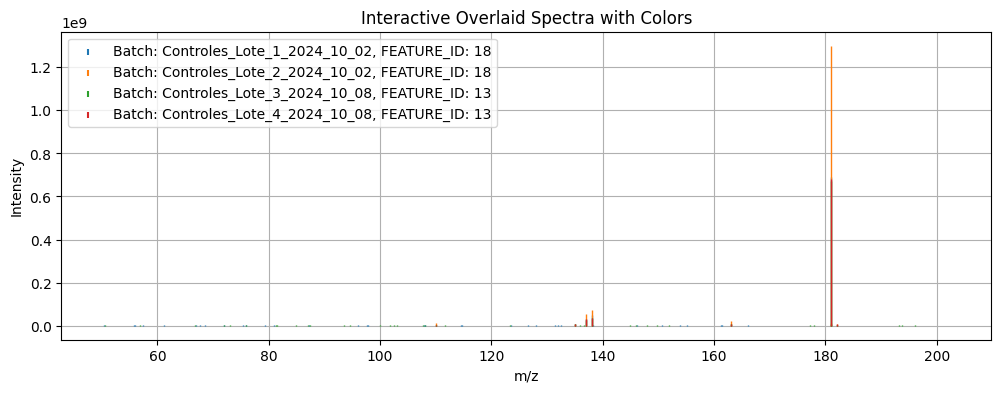

In [31]:
# Example: Choose FEATURE_IDs for different batches
batch_feature_map = {
    "Controles_Lote_1_2024_10_02": "18",  # FEATURE_ID for the first batch
    "Controles_Lote_2_2024_10_02": "18",  # FEATURE_ID for the second batch
    "Controles_Lote_3_2024_10_08": "13",  # FEATURE_ID for the third batch
    "Controles_Lote_4_2024_10_08": "13",  # FEATURE_ID for the fourth batch
    # Add more batches and FEATURE_IDs as needed
}

# Plot the spectra
plot_spectra_as_stem_with_colors(spectra, batch_feature_map, title="Interactive Overlaid Spectra with Colors")